# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1

Use the Monte Carlo NVT code we have provided to print out instantaneous values of potential energy per particle, $U/N$, and pressure, $P$, along **equilibrated** Monte Carlo simulations (of  $M=10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)
Nota: se vuoi NVE devi usare Molecular Dynamics, se vuoi NVT devi usare Monte Carlo.

Nota: la sottocartella "config" contiene i file che il programma prende effettivamente come input, cioè le condizioni iniziali di temperatura, densità, ecc. e una configurazione di posizioni iniziali.

La sottocartella "input" contiene una collezione di condizioni iniziali relative a gas, solido e liquido, e altrettante configurazioni iniziali, calcolate equilibrando ciascuna fase, e infine una configurazione iniziale di solido fcc, dalla quale si può partire per l'equilibrazione.

In [409]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

phase = ["Gas", "Liquido", "Solido" ]

def plotConfig(fileName,elevation,azimuth):
    fig = plt.figure(figsize=(10,8))
    X, Y, Z = np.loadtxt(fileName,usecols=(0,1,2),unpack=True)
    ax = fig.add_subplot(121, projection='3d',proj_type='ortho')
    ax.scatter(X, Y, Z, c='blue', marker='.',s=100)
    ax.view_init(elev=elevation, azim=azimuth)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    bound=0.5
    ax.set_xlim(-bound,bound)
    ax.set_ylim(-bound,bound)
    ax.set_zlim(-bound,bound)
    plot()
    plt.show()

In [517]:
# stampa le condizioni iniziali
# in modo leggibile
def printInput(fileDiInput):
    lines = fileDiInput.split('\n')[:7]
    custom_strings = ['Temperatura: ', 'Numero Particelle: ',
                      'Densità: ', 'Distanza di Cutoff: ',
                      'Delta: ', 'Numero N di blocchi: ', 
                      'Numero L di step per blocco: ']
    modified_lines = [custom_strings[i] +\
                      line.strip() for i, line in enumerate(lines)]
    for line in modified_lines:
        print(line)

# imposta le condizioni iniziali relative 
# alla fase (solido, liquido, gas)
# e la configurazione iniziale, che può essere di fcc
# o piuttosto di fase equilibrata.

def setInitialConfig(fase,initialConfig,\
                     step,Nblocchi,LStepBlocco,cartellaMadre):
    with open("input/input."+fase, "r") as file:
        input_content = file.read()
    customInput1=input_content.\
        replace('10\n1000', \
                str(Nblocchi)+'\n'+str(LStepBlocco)+'\n'+cartellaMadre)
    print(step)
    customInput=customInput1.\
        replace('0.21', str(step))
    with open("config/input.dat", "w") as file:
        file.write(customInput)
    Xfcc,Yfxx,Zfxx= np.loadtxt(initialConfig,usecols=(0,1,2),unpack=True)
    data = np.column_stack((Xfcc,Yfxx,Zfxx))
    np.savetxt('config/config.0', data, fmt='%.6e', delimiter='\t')
    fccTrue='fcc'
    if(not initialConfig=='input/config.fcc'):
        fccTrue='equilibrio'
    print("HO IMPOSTATO LA CONFIGURAZIONE INIZIALE"+'\n'+
          fase+' '+fccTrue+' con')
    printInput(customInput)
    plotConfig('config/config.0',0,0)

In [478]:
import subprocess
import os
import shutil


def runSimulation(fase, cartella_origine):

    subprocess.run('./Monte_Carlo_NVT.exe')

    sottocartella_destinazione = cartella_origine+fase

    for file in os.listdir(cartella_origine):
        origine_file = os.path.join(cartella_origine, file)
        destinazione_file = os.path.join(sottocartella_destinazione, file)
        if os.path.isfile(origine_file):
            shutil.move(origine_file, destinazione_file)
    print('HO OTTENUTO LA CONFIGURAZIONE FINALE\n'+
          fase)
    plotConfig(cartella_origine+fase+'/config.final',0,0)
    
def plotData(cartella_origine):

    for i in range (0,3) :
        x, epot, epot_prog, epoterr_prog = np.loadtxt(cartella_origine+phase[i]+"/output.epot.0", max_rows=5000, unpack=True)
        y, pres, pres_prog, preserr_prog = np.loadtxt(cartella_origine+phase[i]+"/output.pres.0",max_rows=5000, unpack=True)
        plt.figure(figsize=(15,7))
        plt.plot(x,pres, color='orange', label="Pressione")
        plt.plot(y,epot, color='red', label="U/N")
        plt.title(phase[i],fontsize=25)
        plt.xlabel('Passi',fontsize=15)
        plt.ylabel('Grandezze termodinamiche',fontsize=15)
        plt.legend(fontsize=20)
        plt.grid(True)
        plt.show()

### Parto dalla configurazione di solido fcc ed equilibro le tre fasi.

0.11
HO IMPOSTATO LA CONFIGURAZIONE INIZIALE
solid fcc con
Temperatura: 0.8
Numero Particelle: 108
Densità: 1.1
Distanza di Cutoff: 2.2
Delta: 0.11
Numero N di blocchi: 500
Numero L di step per blocco: 20


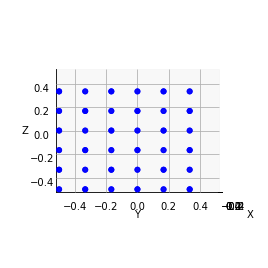

Classic Lennard-Jones fluid        
Monte Carlo simulation             

Interatomic potential v(r) = 4 * [(1/r)^12 - (1/r)^6]

Boltzmann weight exp(- beta * sum_{i<j} v(r_ij) ), beta = 1/T 

The program uses Lennard-Jones units 
Temperature = 0.8
Number of particles = 108
Density of particles = 1.1
Volume of the simulation box = 98.1818
Edge of the simulation box = 4.61329
Cutoff of the interatomic potential = 2.2

Tail correction for the potential energy = -0.862908
Tail correction for the virial           = -1.72073
The program perform Metropolis moves with uniform translations
Moves parameter = 0.11
Number of blocks = 500
Number of steps in one block = 20

Read initial configuration from file config.0 

Initial potential energy (with tail corrections) = -8.71336
Virial                   (with tail corrections) = 0.337311
Pressure                 (with tail corrections) = 1.25104

acceptance: 
0.513426 [========================================] 100 %
Print final configuration to fil

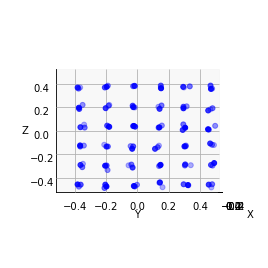

0.2
HO IMPOSTATO LA CONFIGURAZIONE INIZIALE
liquid fcc con
Temperatura: 1.1
Numero Particelle: 108
Densità: 0.8
Distanza di Cutoff: 2.5
Delta: 0.2
Numero N di blocchi: 500
Numero L di step per blocco: 20


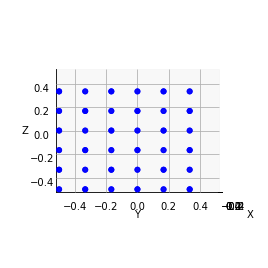

Classic Lennard-Jones fluid        
Monte Carlo simulation             

Interatomic potential v(r) = 4 * [(1/r)^12 - (1/r)^6]

Boltzmann weight exp(- beta * sum_{i<j} v(r_ij) ), beta = 1/T 

The program uses Lennard-Jones units 
Temperature = 1.1
Number of particles = 108
Density of particles = 0.8
Volume of the simulation box = 135
Edge of the simulation box = 5.12993
Cutoff of the interatomic potential = 2.5

Tail correction for the potential energy = -0.428346
Tail correction for the virial           = -0.855522
The program perform Metropolis moves with uniform translations
Moves parameter = 0.2
Number of blocks = 500
Number of steps in one block = 20

Read initial configuration from file config.0 

Initial potential energy (with tail corrections) = -6.79309
Virial                   (with tail corrections) = -8.61673
Pressure                 (with tail corrections) = -6.01338

acceptance: 
0.503241 [========================================] 100 %
Print final configuration to file c

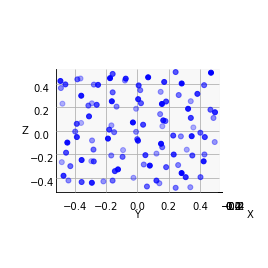

6.0
HO IMPOSTATO LA CONFIGURAZIONE INIZIALE
gas fcc con
Temperatura: 1.2
Numero Particelle: 108
Densità: 0.05
Distanza di Cutoff: 5.0
Delta: 6.0
Numero N di blocchi: 500
Numero L di step per blocco: 20


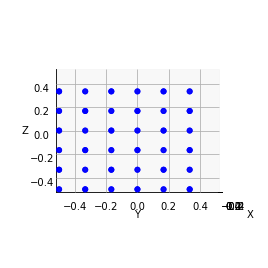

Classic Lennard-Jones fluid        
Monte Carlo simulation             

Interatomic potential v(r) = 4 * [(1/r)^12 - (1/r)^6]

Boltzmann weight exp(- beta * sum_{i<j} v(r_ij) ), beta = 1/T 

The program uses Lennard-Jones units 
Temperature = 1.2
Number of particles = 108
Density of particles = 0.05
Volume of the simulation box = 2160
Edge of the simulation box = 12.9266
Cutoff of the interatomic potential = 5

Tail correction for the potential energy = -0.00335096
Tail correction for the virial           = -0.00670178
The program perform Metropolis moves with uniform translations
Moves parameter = 6
Number of blocks = 500
Number of steps in one block = 20

Read initial configuration from file config.0 

Initial potential energy (with tail corrections) = -0.0351882
Virial                   (with tail corrections) = -0.0703006
Pressure                 (with tail corrections) = 0.056485

acceptance: 
0.611111 [========================================] 100 %
Print final configuration to 

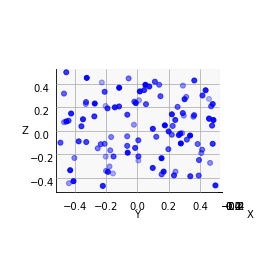

In [518]:
#Equilibrazione:
import numpy as np
import matplotlib.pyplot as plt

phase = ["solid", "liquid","gas"]
passo=[0.11,0.2,6.]

for i in range (0,3) :
    setInitialConfig(phase[i],'input/config.fcc',passo[i],500,20,'equilibrazione/')
    runSimulation(phase[i],'equilibrazione/')

Si trova

| fase         | Solido   | Liquido  | Gas   |
|--------------|----------|----------|-------|
| $\delta$     | 0.11     | 0.2      | 6     |
| accettazione | 0.5      | 0.5      | 0.61  |

L'accettazione del gas non si riesce a ridurre sotto questo valore.

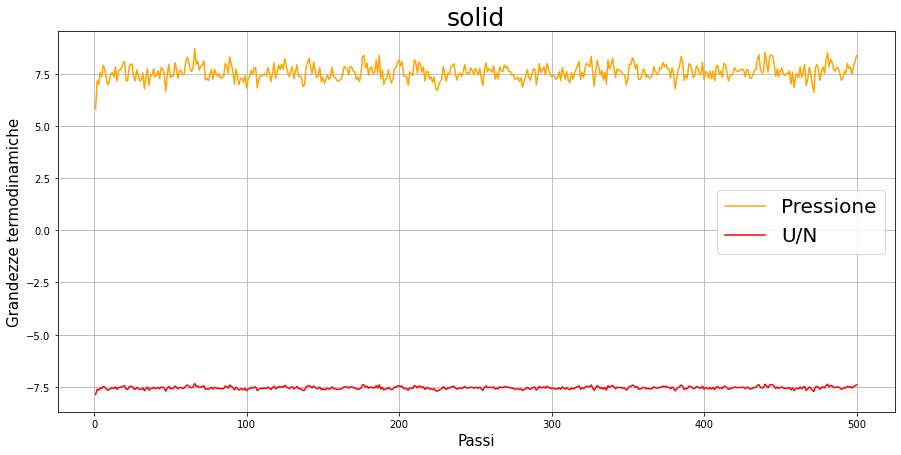

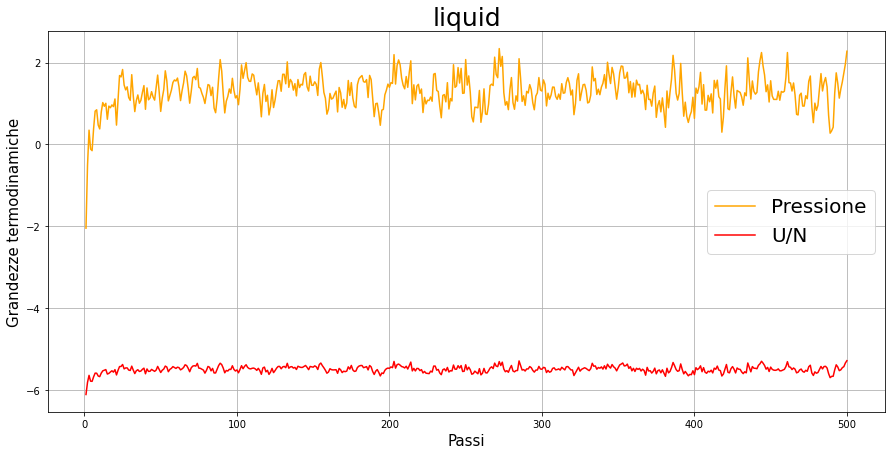

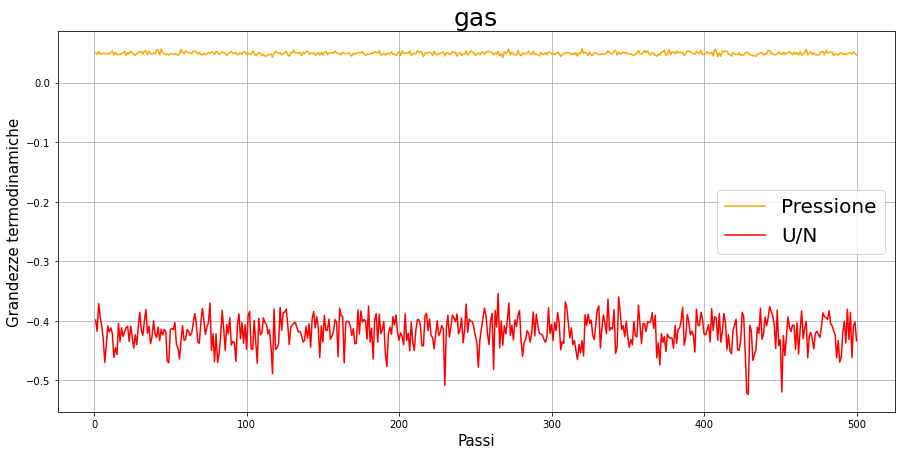

In [519]:
plotData('equilibrazione/')

### Osservo che dopo 10000 passi, le fasi si possono considerare equilibrate. Osservo che l'energia potenziale del gas presenta forti fluttuazioni che non si riducono mai nel tempo, e bisogna tenerne conto. Qualcosa di simile si osserva anche per la pressione del fluido.

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ and $P$ to obtain the Monte Carlo correlation time</span> via a fit with an exponential function. This will suggest you how large should be the blocks in your simulations.

$$ \chi (t) = \frac { 
\langle x(t')x(t'+t) \rangle _{t'} 
-\langle x \rangle ^2  
} {\sigma_x ^2}
$$

Lancio ora le simulazioni a partire da configurazioni di equilibrio ottenute nella fase di equilibrazione.

0.11
HO IMPOSTATO LA CONFIGURAZIONE INIZIALE
solid equilibrio con
Temperatura: 0.8
Numero Particelle: 108
Densità: 1.1
Distanza di Cutoff: 2.2
Delta: 0.11
Numero N di blocchi: 50000
Numero L di step per blocco: 1


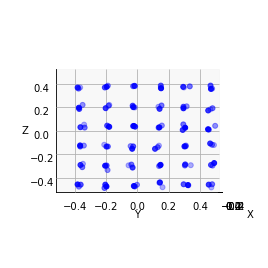

Classic Lennard-Jones fluid        
Monte Carlo simulation             

Interatomic potential v(r) = 4 * [(1/r)^12 - (1/r)^6]

Boltzmann weight exp(- beta * sum_{i<j} v(r_ij) ), beta = 1/T 

The program uses Lennard-Jones units 
Temperature = 0.8
Number of particles = 108
Density of particles = 1.1
Volume of the simulation box = 98.1818
Edge of the simulation box = 4.61329
Cutoff of the interatomic potential = 2.2

Tail correction for the potential energy = -0.862908
Tail correction for the virial           = -1.72073
The program perform Metropolis moves with uniform translations
Moves parameter = 0.11
Number of blocks = 50000
Number of steps in one block = 1

Read initial configuration from file config.0 

Initial potential energy (with tail corrections) = -7.44291
Virial                   (with tail corrections) = 6.64746
Pressure                 (with tail corrections) = 8.19221

acceptance: 
0.462963 [========================================] 100 %                                 

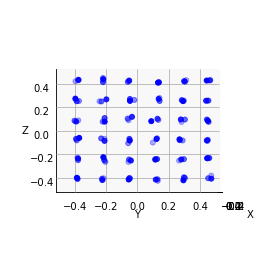

0.2
HO IMPOSTATO LA CONFIGURAZIONE INIZIALE
liquid equilibrio con
Temperatura: 1.1
Numero Particelle: 108
Densità: 0.8
Distanza di Cutoff: 2.5
Delta: 0.2
Numero N di blocchi: 50000
Numero L di step per blocco: 1


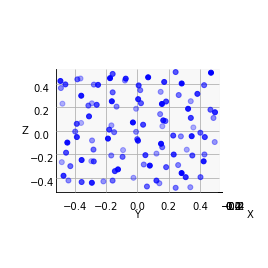

Classic Lennard-Jones fluid        
Monte Carlo simulation             

Interatomic potential v(r) = 4 * [(1/r)^12 - (1/r)^6]

Boltzmann weight exp(- beta * sum_{i<j} v(r_ij) ), beta = 1/T 

The program uses Lennard-Jones units 
Temperature = 1.1
Number of particles = 108
Density of particles = 0.8
Volume of the simulation box = 135
Edge of the simulation box = 5.12993
Cutoff of the interatomic potential = 2.5

Tail correction for the potential energy = -0.428346
Tail correction for the virial           = -0.855522
The program perform Metropolis moves with uniform translations
Moves parameter = 0.2
Number of blocks = 50000
Number of steps in one block = 1

Read initial configuration from file config.0 

Initial potential energy (with tail corrections) = -5.32742
Virial                   (with tail corrections) = 1.4611
Pressure                 (with tail corrections) = 2.04888

acceptance: 
0.490741 [========================================] 100 %
Print final configuration to file con

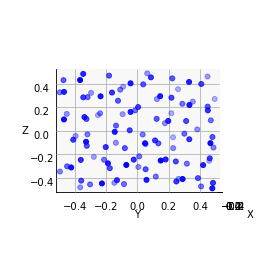

6.0
HO IMPOSTATO LA CONFIGURAZIONE INIZIALE
gas equilibrio con
Temperatura: 1.2
Numero Particelle: 108
Densità: 0.05
Distanza di Cutoff: 5.0
Delta: 6.0
Numero N di blocchi: 50000
Numero L di step per blocco: 1


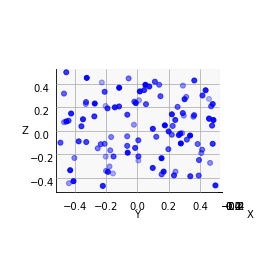

Classic Lennard-Jones fluid        
Monte Carlo simulation             

Interatomic potential v(r) = 4 * [(1/r)^12 - (1/r)^6]

Boltzmann weight exp(- beta * sum_{i<j} v(r_ij) ), beta = 1/T 

The program uses Lennard-Jones units 
Temperature = 1.2
Number of particles = 108
Density of particles = 0.05
Volume of the simulation box = 2160
Edge of the simulation box = 12.9266
Cutoff of the interatomic potential = 5

Tail correction for the potential energy = -0.00335096
Tail correction for the virial           = -0.00670178
The program perform Metropolis moves with uniform translations
Moves parameter = 6
Number of blocks = 50000
Number of steps in one block = 1

Read initial configuration from file config.0 

Initial potential energy (with tail corrections) = -0.363315
Virial                   (with tail corrections) = -0.226306
Pressure                 (with tail corrections) = 0.0486847

acceptance: 
0.685185 [========================================] 100 %=                             

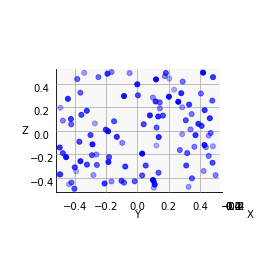

In [525]:
for i in range (0,3) :
    setInitialConfig(phase[i],'equilibrazione/'+phase[i]+'/config.final',passo[i],50000,1,'correlazione/')
    runSimulation(phase[i],'correlazione/')

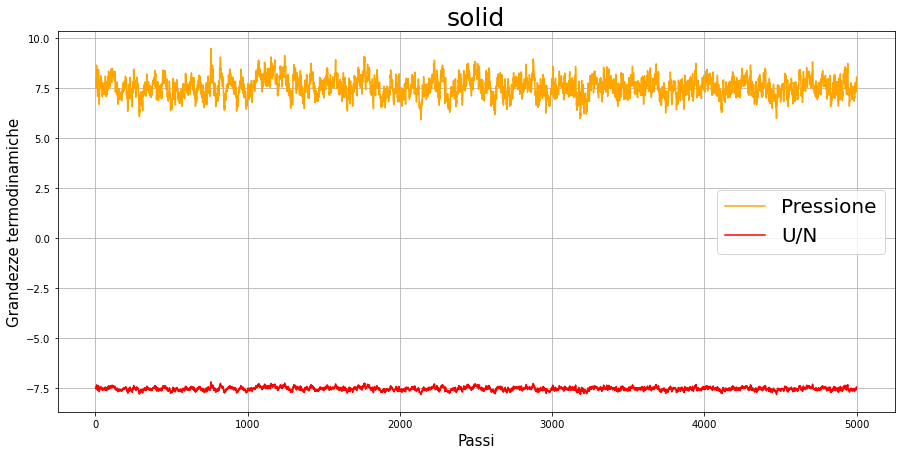

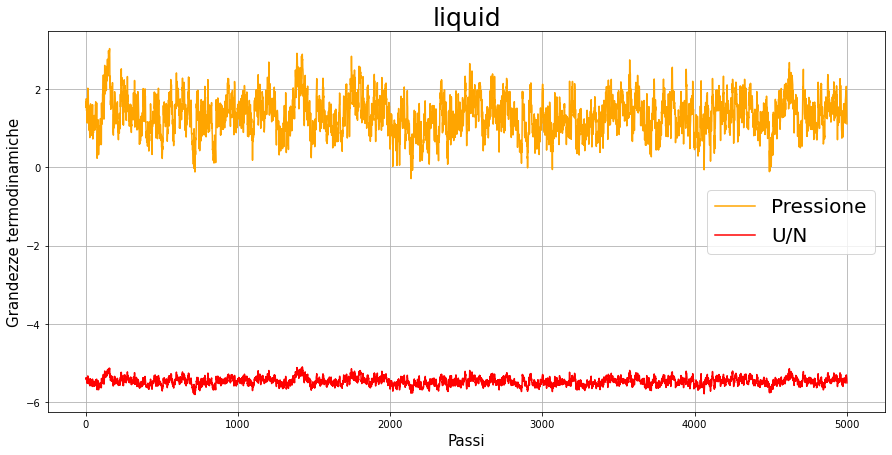

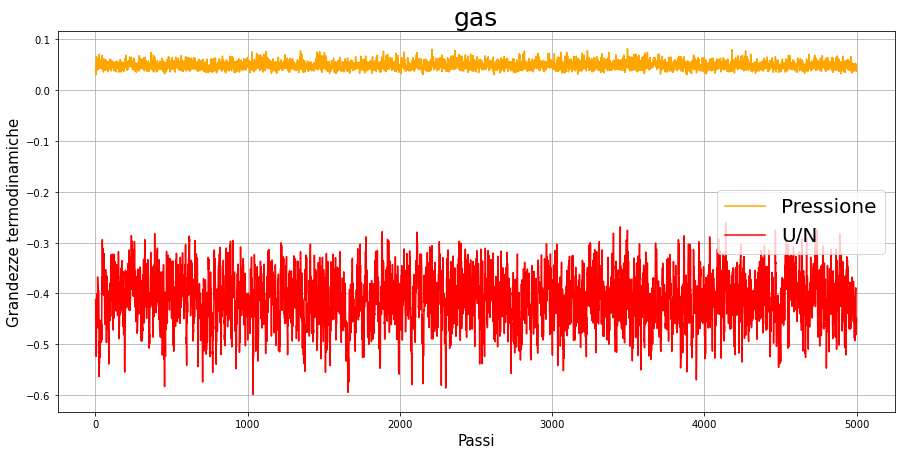

In [526]:
plotData('correlazione/')

#### Osserviamo, che l'energia potenziale del gas anche all'equilibrio fluttua notevolmente ed è notevolmente correlata (su scala di circa 10000 passi Monte Carlo).
#### Altra osservabile in cui si osservano notevoli correlazioni, anche se non di tale entità (cioè su scala molto più piccola, circa 1000 passi Monte Carlo), è la pressione del liquido.

In [527]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def treExp(x, a, b, c,d,e,f,g,h,i):
    return a * np.exp(-b * x) + c + d * np.exp(-e * x) + f \
                + g * np.exp(-h * x) + i
def dueExp(x,a,b,c,d,e,f):
    return a * np.exp(-b * x) + c + d * np.exp(-e * x)+f

def plotECorrelazione (fase,osservabile,T):

    ene = (np.loadtxt(fname = "correlazione/"+ fase+"/output."+osservabile+".0", usecols=(1)))#[30000:40000]

    def autocorrelazione(x,T):
        tmp = (np.array([np.average(x[:-t]*x[t:]) for t in np.arange(1,T)]) -np.average(x)**2)/np.std(x)**2
        return np.append(1,tmp)

    xData = (np.arange(T))
    yData = (autocorrelazione(ene,T)) #vettore lungo T

    plt.plot (xData,yData,marker='.',markersize=4,linewidth=0)

    if (fase == "Liquido" and osservabile == "epot"):
        popt, pcov = curve_fit(treExp, xData, yData)
        tau = 1/min(popt[1],popt[4],popt[7])
        plt.plot(xData, treExp(xData, *popt), 'r-',    \
                 label = 'tau=%5.3f' % tau, linewidth=.5)
    else:
        popt, pcov = curve_fit(dueExp, xData, yData)
        tau = 1/min(popt[1],popt[4])
        plt.plot(xData, dueExp(xData, *popt), 'r-',    \
                 label = 'tau=%5.3f' % tau, linewidth=.5 )


    plt.xlabel('T = tempo di correlazione')
    plt.ylabel('Autocorrelazione '+osservabile+' '+fase+' (T)')
    plt.grid(True)

    plt.legend(loc="lower left")
    plt.ylim((0,1))
    plt.show()
    #print("tau = ", 1/popt[1])

### Energia Potenziale

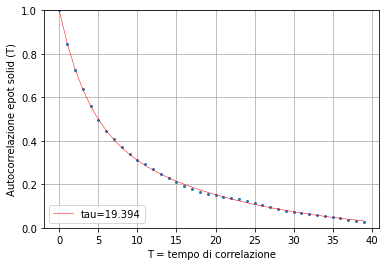

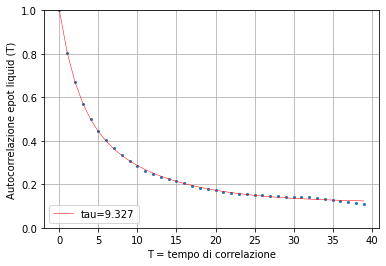

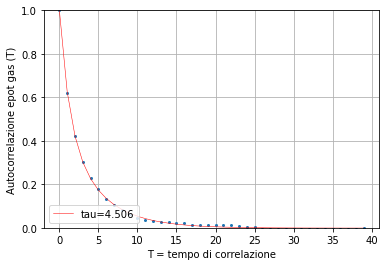

In [531]:
import warnings
T=40

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    
    plotECorrelazione("solid", "epot",T)
    plotECorrelazione("liquid", "epot",T)
    plotECorrelazione("gas","epot",T)


### Pressione

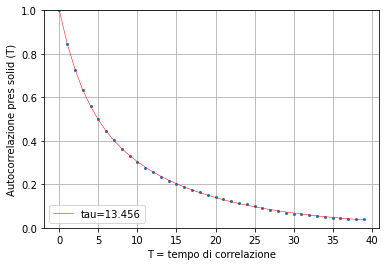

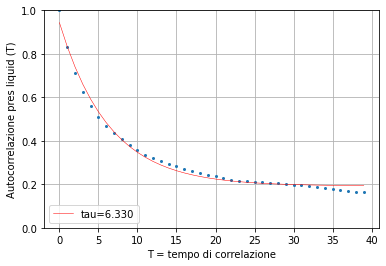

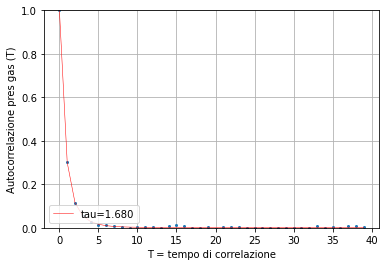

In [533]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    plotECorrelazione("solid", "pres",T)
    plotECorrelazione("liquid", "pres",T)
    plotECorrelazione("gas","pres",T)

Osserviamo, come già detto, che l'energia potenziale del gas anche all'equilibrio fluttua notevolmente ed è notevolmente correlata (su scala di circa 10000 passi Monte Carlo).
Altra osservabile in cui si osservano notevoli correlazioni, anche se non di tale entità (cioè su scala molto più piccola, circa 1000 passi Monte Carlo), è la pressione del liquido.

Dunque nel valutare queste due osservabili per queste fasi, dovremmo scegliere blocchi più grandi rispetto agli altri casi.

L'autocorrelazione dev'essere calcolata fino a tempi T significativamente minori del tempo Monte Carlo totale (la lunghezza del segnale), o si rischia di ottenere risultati non attendibili: <b>si hanno comportamenti che deviano dall'esponenziale quando T è confrontabile con la dimensione dei dati (il valore della correlazione per tempi simili al tempo totale non hanno molto senso poiché sono la media su pochi valori).</b>
Per avere l'autocorrelazione su uno spettro di T abbastanza ampi però non vogliamo neanche sceglierlo troppo piccolo (perché?). 
Come compromesso abbiamo posto T = 100.

Dall'analisi di questi dati osserviamo che nella maggior parte dei casi con blocchi da 10 passi dovremmo essere coperti.

2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ and $P$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

Nota: per 5000 steps/blocco potrei avere fluttuazioni -> mi servono almeno 200000 blocchi perché venga bene

Nota: per questo esercizio, l'incertezza aumenta all'aumentare di steps/blocco fino a saturare, quando satura è la giusta steps/blocco.

In [4]:
import numpy as np
from matplotlib.pyplot import *
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

ene = (np.loadtxt(fname = "dati/Gas/output.epot.0", usecols=(1)))#[30000:40000]

dati = []
errori=[]

#    axs[0].xlabel('t = passi Monte Carlo')
 #   axs[0].ylabel('Epot Gas (t)')
   # axs[0].grid(True)

for L in range (1,50000):
    segnaleRidotto = [np.average(ene[L*i:L*(i+1)]) for i in range((int)(len(ene)/L))]
    dati.append(segnaleRidotto)
    errori.append(np.std(segnaleRidotto))


def f(L):
    fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(4,2))
    axs[0].set_ylim((-0.56,-0.2))
    axs[0].set_xlim((0,50000))
    axs[0].plot(np.arange(len(dati[L]))*L,dati[L],marker='.', markersize=4,linewidth=0)

    
    axs[1].set_ylim((0,0.08))
    axs[1].set_xlim((0,10000))
    axs[1].plot(np.arange(10000),1./np.sqrt(np.arange(10000)) ,marker='.',markersize=4,linewidth=0)
    
    axs[1].plot(L,errori[L],marker='.', markersize=10)

#f(800)
interact(f, L=widgets.IntSlider(min=1, max=10000, step=10, value=10));
show()

OSError: dati/Gas/output.epot.0 not found.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
Emin = 0
Emax = 1000000
ene = (np.loadtxt(fname = "gas1milionepunti/output.epot.0", usecols=(1)))

errori = np.zeros(1)
errori2 = np.zeros(1)
# se fisso L e faccio aumentare N, la deviazione standard non cambia
for L in range(10,50000,10):
    N = (int)((Emax -Emin)/L)
    segnaleRidotto =np.array([np.average(ene[Emin +L*i:Emin +L*(i+1)]) for i in range(N)])
    errori = np.append(errori, np.std(segnaleRidotto)) 
    errori2 = np.append(errori2, np.std(segnaleRidotto) )    


OSError: gas1milionepunti/output.epot.0 not found.

NameError: name 'errori' is not defined

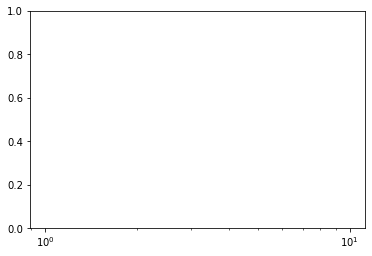

In [6]:

plt.xscale(value="log")
plt.plot(errori,'.', markersize=0.5)

plt.show()
# nota che l'asse x andrebbe moltiplicata per 10 (visto che gli L sono spaziati di 10)

plt.xscale(value="linear")
plt.plot(errori,'.', markersize=0.5)
plt.show()

In [ ]:
fig=plt.figure('prova')
ax=fig.add_subplot(111)
#p=plt.loglog(errori2)
p=plt.plot(errori2*np.sqrt(np.arange(errori2.size)))
plt.grid()
#ax.set_aspect('equal')
#plt.xlim(1,1000)
#plt.ylim(.001,.1)
x=np.linspace(1,1000)
#plt.plot(x,.01/np.sqrt(x))

In [ ]:
np.exp(-4)
np.log(0.01)
4.5*30
#in 4.5*tau  (taucirca 30)riduco le correlazioni all'1 percento delle iniziali
# torna con quest'ultima stima (circa 200)

### Exercise 07.2

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the Monte Carlo NVT code</span> we have provided: average value of $g(r)$ in each block (with output in the file: output.gofr.0), final average value of $g(r)$ with statistical uncertainties (with output in the file: output.gave.0).
Nota: per il calcolo della g(r) dovrebbero bastare 20000 step

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, inside the previously used Molecular Dynamics code</span>.

### Exercise 07.4

By means of your upgraded MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) and Krypton ($\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

<span style="color:red">show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in SI units ... and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>